In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
data=pd.read_csv('Iris (1).csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


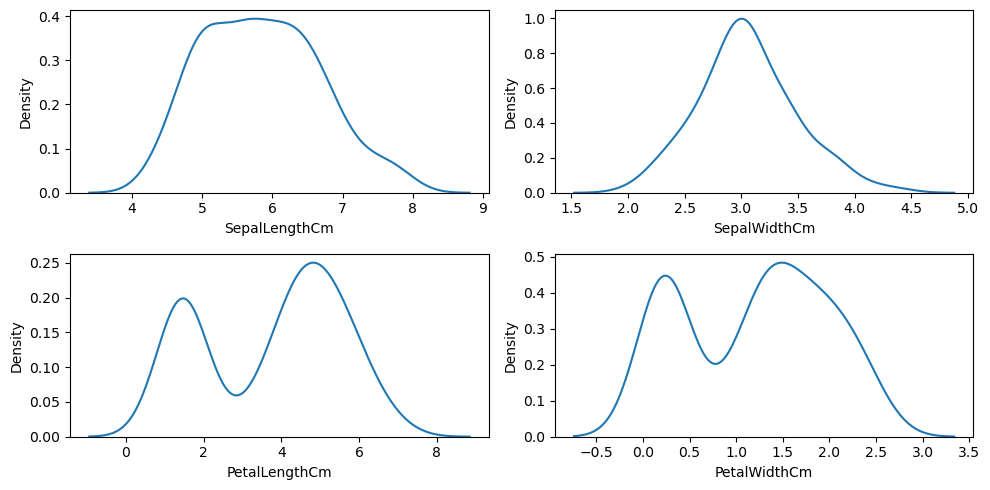

In [13]:
skewness=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].skew()
numeric_column=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
print(skewness)
plt.figure(figsize=(10,5))
plotnumber=1
for column in numeric_column:
  ax =plt.subplot(2,2,plotnumber)
  sns.kdeplot(data[column])
  plt.xlabel(column)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data.tail(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


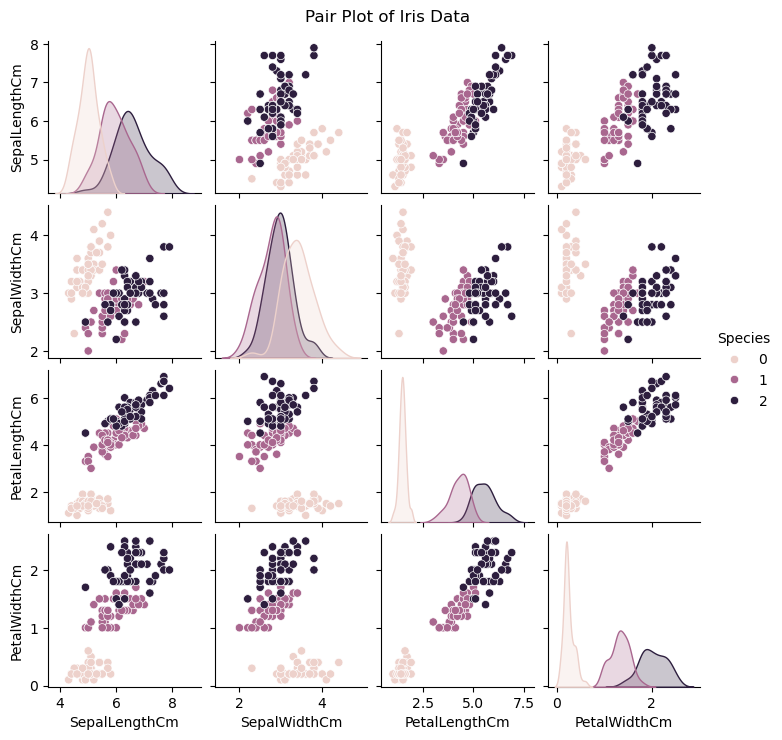

In [15]:
pair = sns.pairplot(
    data,
    vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    hue='Species',
    height=1.8
)
pair.fig.suptitle('Pair Plot of Iris Data', y=1.02)
plt.show()


In [16]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)


Accuracy: 1.0

Macro F1-score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



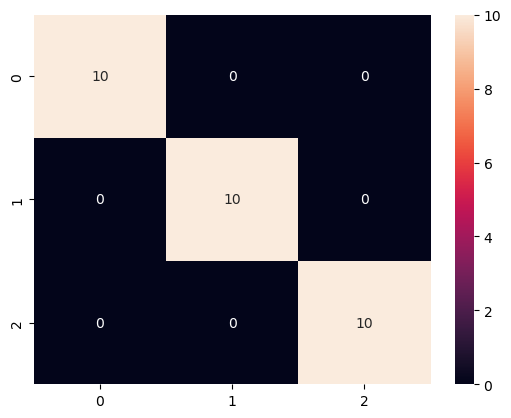

In [23]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_linear))

print("\nMacro F1-score:", f1_score(y_test, y_pred_linear, average='macro'))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test,y_pred_linear))
cm=confusion_matrix(y_test,y_pred_linear)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()


Accuracy: 0.9

Macro F1-score: 0.8976982097186701

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]


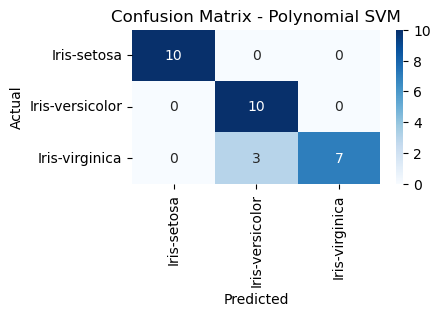


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [26]:
model2=SVC(kernel='poly')
model2.fit(X_train_scaled,y_train)
pred_y2=model2.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, pred_y2))
print("\nMacro F1-score:", f1_score(y_test, pred_y2, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_y2))
cm = confusion_matrix(y_test, pred_y2)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Polynomial SVM')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, pred_y2))

0.9666666666666667
0.9696969696969697
0.9666666666666667
0.9665831244778612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



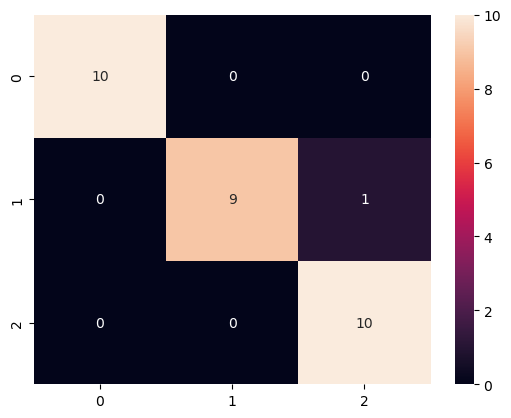

In [27]:
model3=SVC(kernel='rbf')
model3.fit(X_train_scaled,y_train)
pred_y3=model3.predict(X_test_scaled)
print(accuracy_score(y_test,pred_y3))
print(precision_score(y_test,pred_y3,average='macro'))
print(recall_score(y_test,pred_y3,average='macro'))
print(f1_score(y_test,pred_y3,average='macro'))
cm3=confusion_matrix(y_test,pred_y3)
print(classification_report(y_test,pred_y3))
sns.heatmap(cm3,annot=True,fmt='d')
plt.show()